In [1]:
library(maftools)

In [2]:
raw<-read.table(file="./Bioskryb_DNA_final_summary.txt",header=T)
variant_anno<-read.csv(file="../../variant_annotation/780_variant_annotation_by_all_samples.csv",header=T)

In [3]:
colnames(raw)
colnames(variant_anno)
unique(raw$Mosaic_shared_btw_WGS_Amp)

[1] "ID"                        "PLATE"                    
 [3] "SAMPLE"                    "CHROM"                    
 [5] "POS"                       "REF"                      
 [7] "ALT"                       "INDIVIDUAL"               
 [9] "CHROM.POS.REF.ALT"         "Mosaic"                   
[11] "ANNO"                      "GENE"                     
[13] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[15] "SEGDUP"                    "HOMOPOLYMER"              
[17] "REF_SEQ"                   "DINUCLEOTIDE"             
[19] "NEAR_INDEL"                "UCSC_RPMSK"               
[21] "DEPTH"                     "REF_COUNT"                
[23] "ALT_COUNT"                 "MAF"                      
[25] "LOWER_CI"                  "UPPER_CI"                 
[27] "CI_IS_GREATER"             "NORMAL_REF_COUNT"         
[29] "NORMAL_ALT_COUNT"          "NORMAL_MAF"               
[31] "NORMAL_LOWER_CI"           "NORMAL_UPPER_CI"          
[33] "NORMAL_CI_IS_GREATER"      "Mosaic_shared_btw_WGS_Amp"
[35] "BINARY"                    "Cell_Type"

[1] "X"                       "variant_list"           
 [3] "sample_number_presented" "HEART"                  
 [5] "ADRENAL"                 "CB"                     
 [7] "CTX"                     "LIVER"                  
 [9] "KIDNEY"                  "POA"                    
[11] "BG"                      "THAL"                   
[13] "SKIN"                    "OLF"                    
[15] "HIP"                     "L"                      
[17] "R"                       "I"                      
[19] "F"                       "P"                      
[21] "O"                       "T"                      
[23] "Cau"                     "Put"                    
[25] "Thal"                    "GP"                     
[27] "Hip"                     "EC"                     
[29] "Olf"                     "CC"                     
[31] "mO"                      "Cb"                     
[33] "DLX1"                    "TBR1"                   
[35] "COUPTF2"                 "Bulk"                   
[37] "NeuN"                    "Brain_only"             
[39] "CTX_only"                "BG_only"                
[41] "THAL_only"               "CTX_BG_only"            
[43] "CTX_BG_shared"           "CTX_HIP_shared"         
[45] "HIP_BG_shard"            "CTX_THAL_shared"        
[47] "Left_only"               "Right_only"             
[49] "IN_only"                 "COUP_only"              
[51] "TBR_only"                "TBR_BR"                 
[53] "DLX_BR"                  "HIP_only"               
[55] "HIP_BG_shared"

[1] 1 0

In [4]:
raw$BINARY<-0
raw$BINARY[raw$NORMAL_UPPER_CI<raw$LOWER_CI ]<-1
#raw$BINARY[raw$NORMAL_UPPER_CI>=raw$LOWER_CI | raw$LOWER_CI<=0.05]<-0
length(unique((raw[raw$BINARY==1,]$CHROM.POS.REF.ALT)))

[1] 1187

In [5]:
length(((raw[raw$BINARY==1,]$CHROM.POS.REF.ALT)))

[1] 53919

# Oncoplot

In [16]:
blacklist<-read.table(file="../blacklist_variants.csv",header=F)
filtered <- subset(raw, BINARY %in% c(1) &
                   #Mosaic_shared_btw_WGS_Amp==1 &
                   !(CHROM.POS.REF.ALT %in% blacklist$V1) & 
                   CHROM.POS.REF.ALT %in% variant_anno[variant_anno$R==1 
                                                       # (variant_anno$R==1 & variant_anno$IN_only==1) | (variant_anno$R==1 & variant_anno$CTX_BG_shared==1)
                                                       # (variant_anno$Right_only==1 & variant_anno$T==1) | 
                                                       # (variant_anno$Right_only==1 & variant_anno$F==1) | 
                                                       # (variant_anno$Right_only==1 & variant_anno$HIP==1) | 
                                                       # (variant_anno$Right_only==1 & variant_anno$CTX_BG_shared==1) | 
                                                       # (variant_anno$Right_only==1 & variant_anno$CTX_HIP_shared==1) | 
                                                       # (variant_anno$Right_only==1 & variant_anno$HIP_BG_shard==1) 
                                                       ,]$variant_list &
                   Cell_Type %in% c("ExN","InN") & PLATE %in% c("PL01","PL02"))

# MV recurrency calculation
recurrency<-data.frame(t(matrix(ncol=length(unique(filtered$CHROM.POS.REF.ALT)))))
colnames(recurrency)<-"Recurrency"
recurrency$variant<-unique(filtered$CHROM.POS.REF.ALT)
rownames(recurrency)<-unique(filtered$CHROM.POS.REF.ALT)
for (i in unique(filtered$CHROM.POS.REF.ALT)){
    recurrency[i,1]<-nrow(subset(filtered, CHROM.POS.REF.ALT==i))
}

# filter out high AF MVs
filtered<-subset(filtered, CHROM.POS.REF.ALT %in% recurrency[recurrency$Recurrency<10 & recurrency$Recurrency>1,]$variant)

In [17]:
length(unique((filtered[filtered$BINARY==1,]$CHROM.POS.REF.ALT)))
length(((filtered[filtered$BINARY==1,]$CHROM.POS.REF.ALT)))

[1] 60

[1] 216

In [18]:
nrow(filtered)
colnames(filtered)

[1] 216

[1] "ID"                        "PLATE"                    
 [3] "SAMPLE"                    "CHROM"                    
 [5] "POS"                       "REF"                      
 [7] "ALT"                       "INDIVIDUAL"               
 [9] "CHROM.POS.REF.ALT"         "Mosaic"                   
[11] "ANNO"                      "GENE"                     
[13] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[15] "SEGDUP"                    "HOMOPOLYMER"              
[17] "REF_SEQ"                   "DINUCLEOTIDE"             
[19] "NEAR_INDEL"                "UCSC_RPMSK"               
[21] "DEPTH"                     "REF_COUNT"                
[23] "ALT_COUNT"                 "MAF"                      
[25] "LOWER_CI"                  "UPPER_CI"                 
[27] "CI_IS_GREATER"             "NORMAL_REF_COUNT"         
[29] "NORMAL_ALT_COUNT"          "NORMAL_MAF"               
[31] "NORMAL_LOWER_CI"           "NORMAL_UPPER_CI"          
[33] "NORMAL_CI_IS_GREATER"      "Mosaic_shared_btw_WGS_Amp"
[35] "BINARY"                    "Cell_Type"

In [19]:
#description of filtered data frame 
print(paste("number of variants:", length(unique(filtered$CHROM.POS.REF.ALT))))
print(paste("number of cells:", length(unique(filtered$SAMPLE))))
print(paste("number of Excitatory neurons:", length(unique(filtered[filtered$Cell_Type=="ExN",]$SAMPLE))))
print(paste("number of Inhibitory neurons:", length(unique(filtered[filtered$Cell_Type=="InN",]$SAMPLE))))
print(paste("number of cells in Frontal lobe:", length(unique(filtered[filtered$PLATE=="PL01",]$SAMPLE))))
print(paste("number of cells in Temporal lobe:", length(unique(filtered[filtered$PLATE=="PL02",]$SAMPLE))))
print(paste("number of cells in Hippocampus:", length(unique(filtered[filtered$PLATE=="PL03",]$SAMPLE))))
print(paste("number of ExN in Frontal lobe:", length(unique(filtered[filtered$PLATE=="PL01" & filtered$Cell_Type=="ExN",]$SAMPLE))))
print(paste("number of ExN in Temporal lobe:", length(unique(filtered[filtered$PLATE=="PL02" & filtered$Cell_Type=="ExN",]$SAMPLE))))
print(paste("number of ExN in Hippocampus:", length(unique(filtered[filtered$PLATE=="PL03" & filtered$Cell_Type=="ExN",]$SAMPLE))))
print(paste("number of InN in Frontal lobe:", length(unique(filtered[filtered$PLATE=="PL01" & filtered$Cell_Type=="InN",]$SAMPLE))))
print(paste("number of InN in Temporal lobe:", length(unique(filtered[filtered$PLATE=="PL02" & filtered$Cell_Type=="InN",]$SAMPLE))))
print(paste("number of InN in Hippocampus:", length(unique(filtered[filtered$PLATE=="PL03" & filtered$Cell_Type=="InN",]$SAMPLE))))

[1] "number of variants: 60"
[1] "number of cells: 104"
[1] "number of Excitatory neurons: 77"
[1] "number of Inhibitory neurons: 27"
[1] "number of cells in Frontal lobe: 48"
[1] "number of cells in Temporal lobe: 56"
[1] "number of cells in Hippocampus: 0"
[1] "number of ExN in Frontal lobe: 36"
[1] "number of ExN in Temporal lobe: 41"
[1] "number of ExN in Hippocampus: 0"
[1] "number of InN in Frontal lobe: 12"
[1] "number of InN in Temporal lobe: 15"
[1] "number of InN in Hippocampus: 0"


In [20]:
onco<-cbind(filtered$CHROM.POS.REF.ALT,".",".","hg19",filtered$CHROM,filtered$POS,filtered$POS,"+","Missense_Mutation","SNP",filtered$REF,filtered$REF,filtered$ALT,
            "","",filtered$SAMPLE,filtered$SAMPLE,filtered$REF,filtered$REF)
onco<-as.data.frame(onco)
colnames(onco)<-c('Hugo_Symbol','Entrez_Gene_Id','Center','NCBI_Build','Chromosome','Start_Position','End_Position','Strand','Variant_Classification','Variant_Type','Reference_Allele','Tumor_Seq_Allele1',
                  'Tumor_Seq_Allele2','dbSNP_RS','dbSNP_Val_Status','Tumor_Sample_Barcode','Matched_Norm_Sample_Barcode','Match_Norm_Seq_Allele1','Match_Norm_Seq_Allele2')

In [21]:
write.table(onco,"./Bioskryb_onco.maf",sep="\t", row.names=FALSE, col.names=TRUE,quote = FALSE)

In [22]:
annotation<-as.data.frame(cbind(filtered$SAMPLE, filtered$PLATE, filtered$Cell_Type))
colnames(annotation)<-c("Tumor_Sample_Barcode","Plate","Cell_Type")
write.table(annotation,"annotation.tsv",row.names=FALSE, col.names=TRUE, quote = FALSE)

In [23]:
laml = read.maf(maf = 'Bioskryb_onco.maf', clinicalData="annotation.tsv",verbose = TRUE)

-Reading
-Validating
-Summarizing
-Processing clinical data
-Finished in 0.069s elapsed (0.163s cpu) 


In [34]:
# PlateColor

PlateColor=c("#C663A5","#FFC022","#7E00A4")
names(PlateColor)=c("PL01","PL02","PL03")

#CellTypeColor

CellTypeColor=c("#7CBD42","#EF6666")
names(CellTypeColor)=c("ExN","InN")

anno_cols = list(Plate = PlateColor, Cell_Type = CellTypeColor)

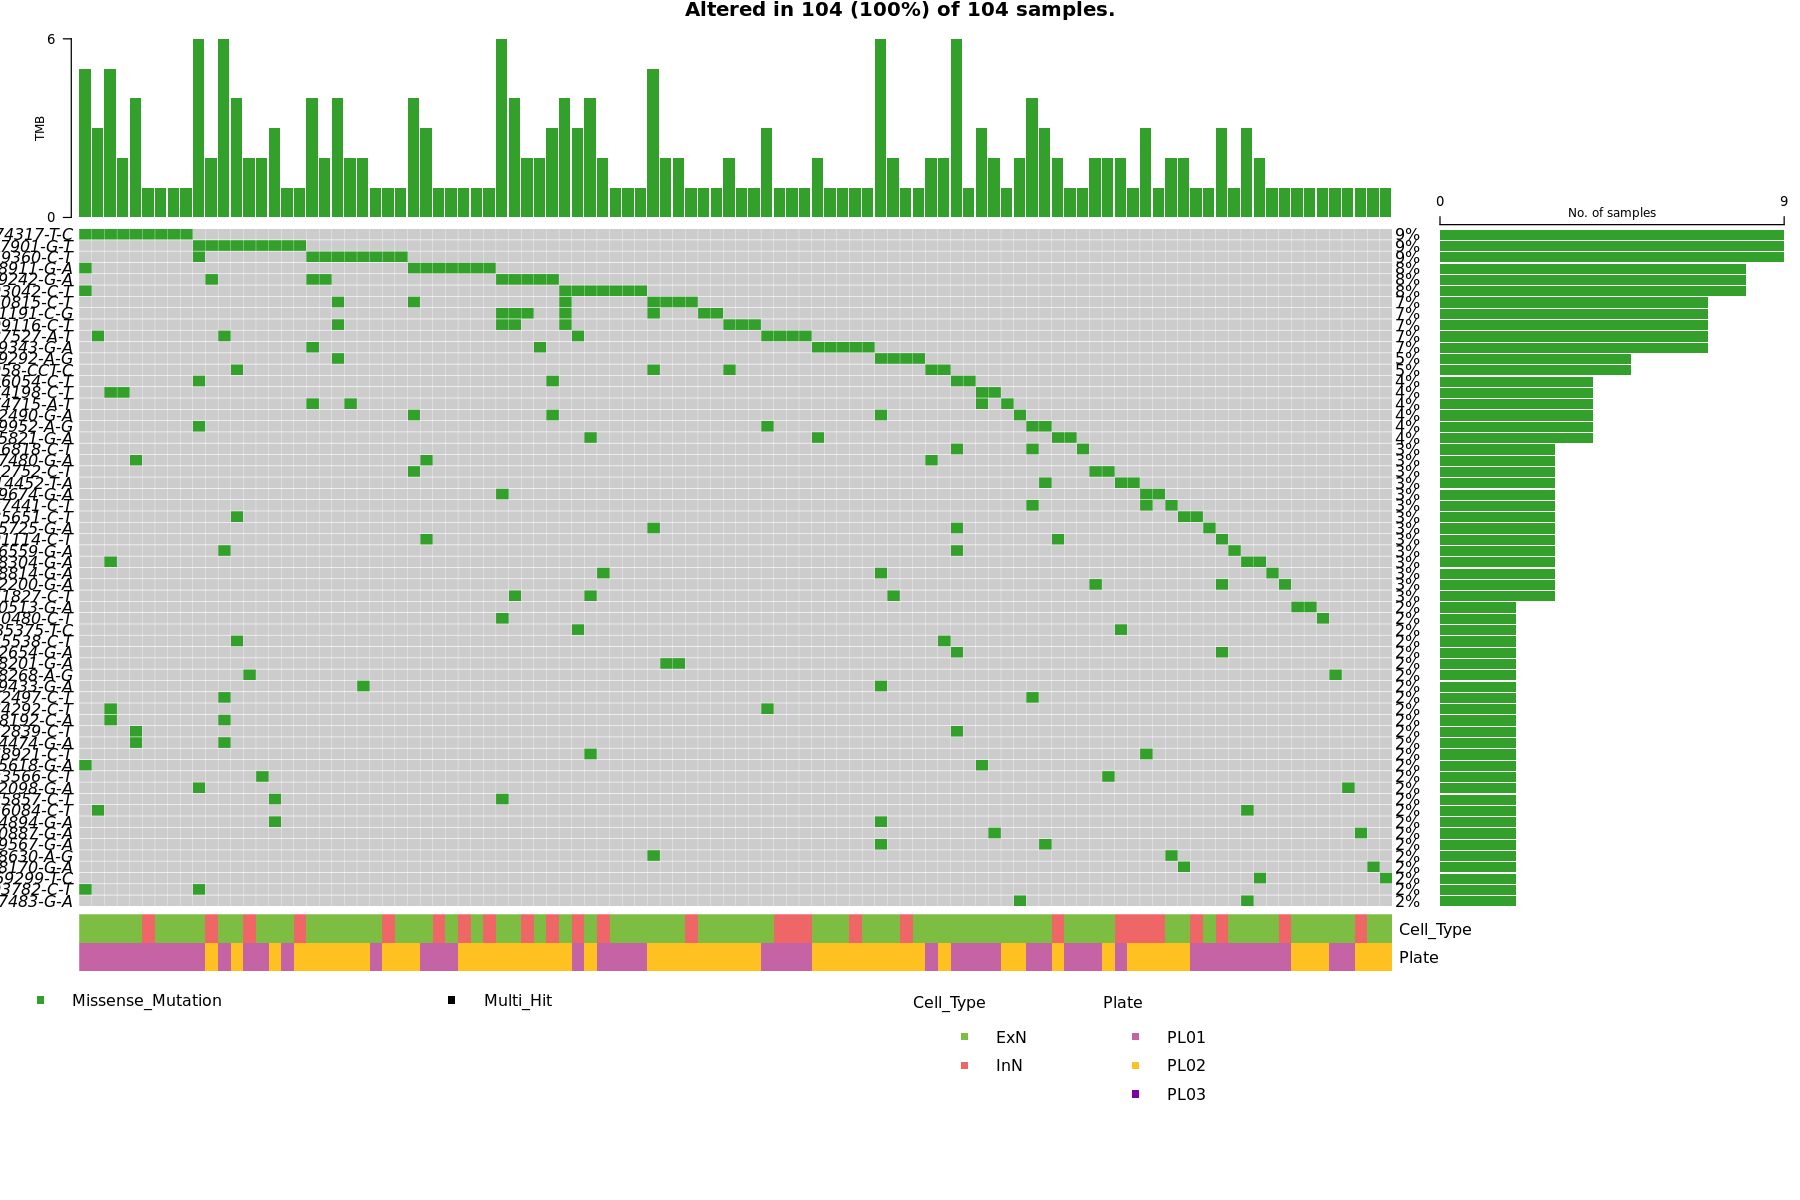

In [35]:
options(repr.plot.width=15, repr.plot.height=10)
oncoplot(maf = laml, clinicalFeatures = c('Cell_Type','Plate'), sortByAnnotation = FALSE, annotationColor = anno_cols ,top = 1000, draw_titv = FALSE)

In [36]:
pdf(file="7669_ResolveOME_oncoplot_sorted2.pdf",height=10, width=15)
oncoplot(maf = laml, clinicalFeatures = c('Cell_Type','Plate'), sortByAnnotation = FALSE, annotationColor = anno_cols, top = 1000, draw_titv = FALSE)
dev.off()

png 
  2

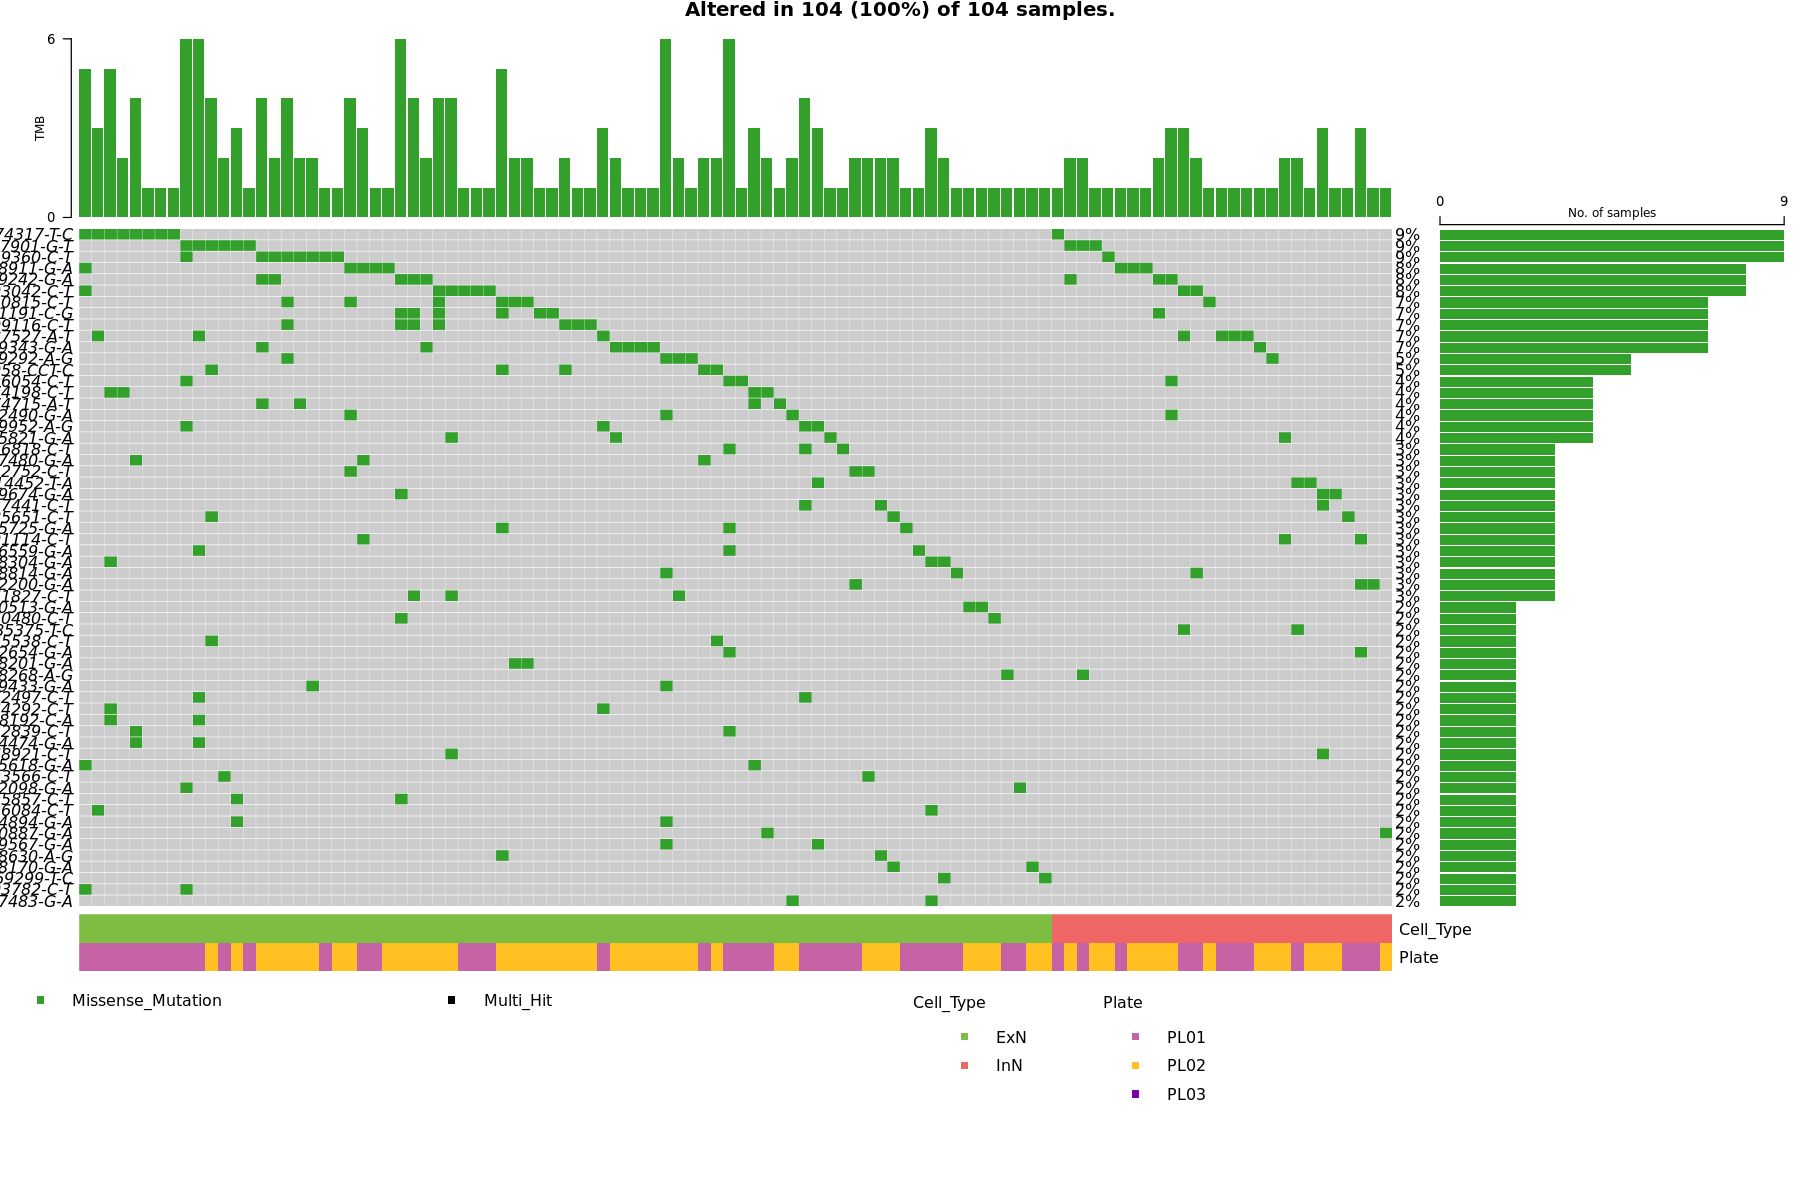

In [37]:
options(repr.plot.width=15, repr.plot.height=10)
oncoplot(maf = laml, clinicalFeatures = c('Cell_Type','Plate'), sortByAnnotation = TRUE, annotationColor = anno_cols ,top = 1000, draw_titv = FALSE)

In [38]:
pdf(file="7669_ResolveOME_oncoplot_celltype_sorted2.pdf",height=10, width=15)
oncoplot(maf = laml, clinicalFeatures = c('Cell_Type','Plate'), sortByAnnotation = TRUE, annotationColor = anno_cols ,top = 1000, draw_titv = FALSE)
dev.off()

png 
  2

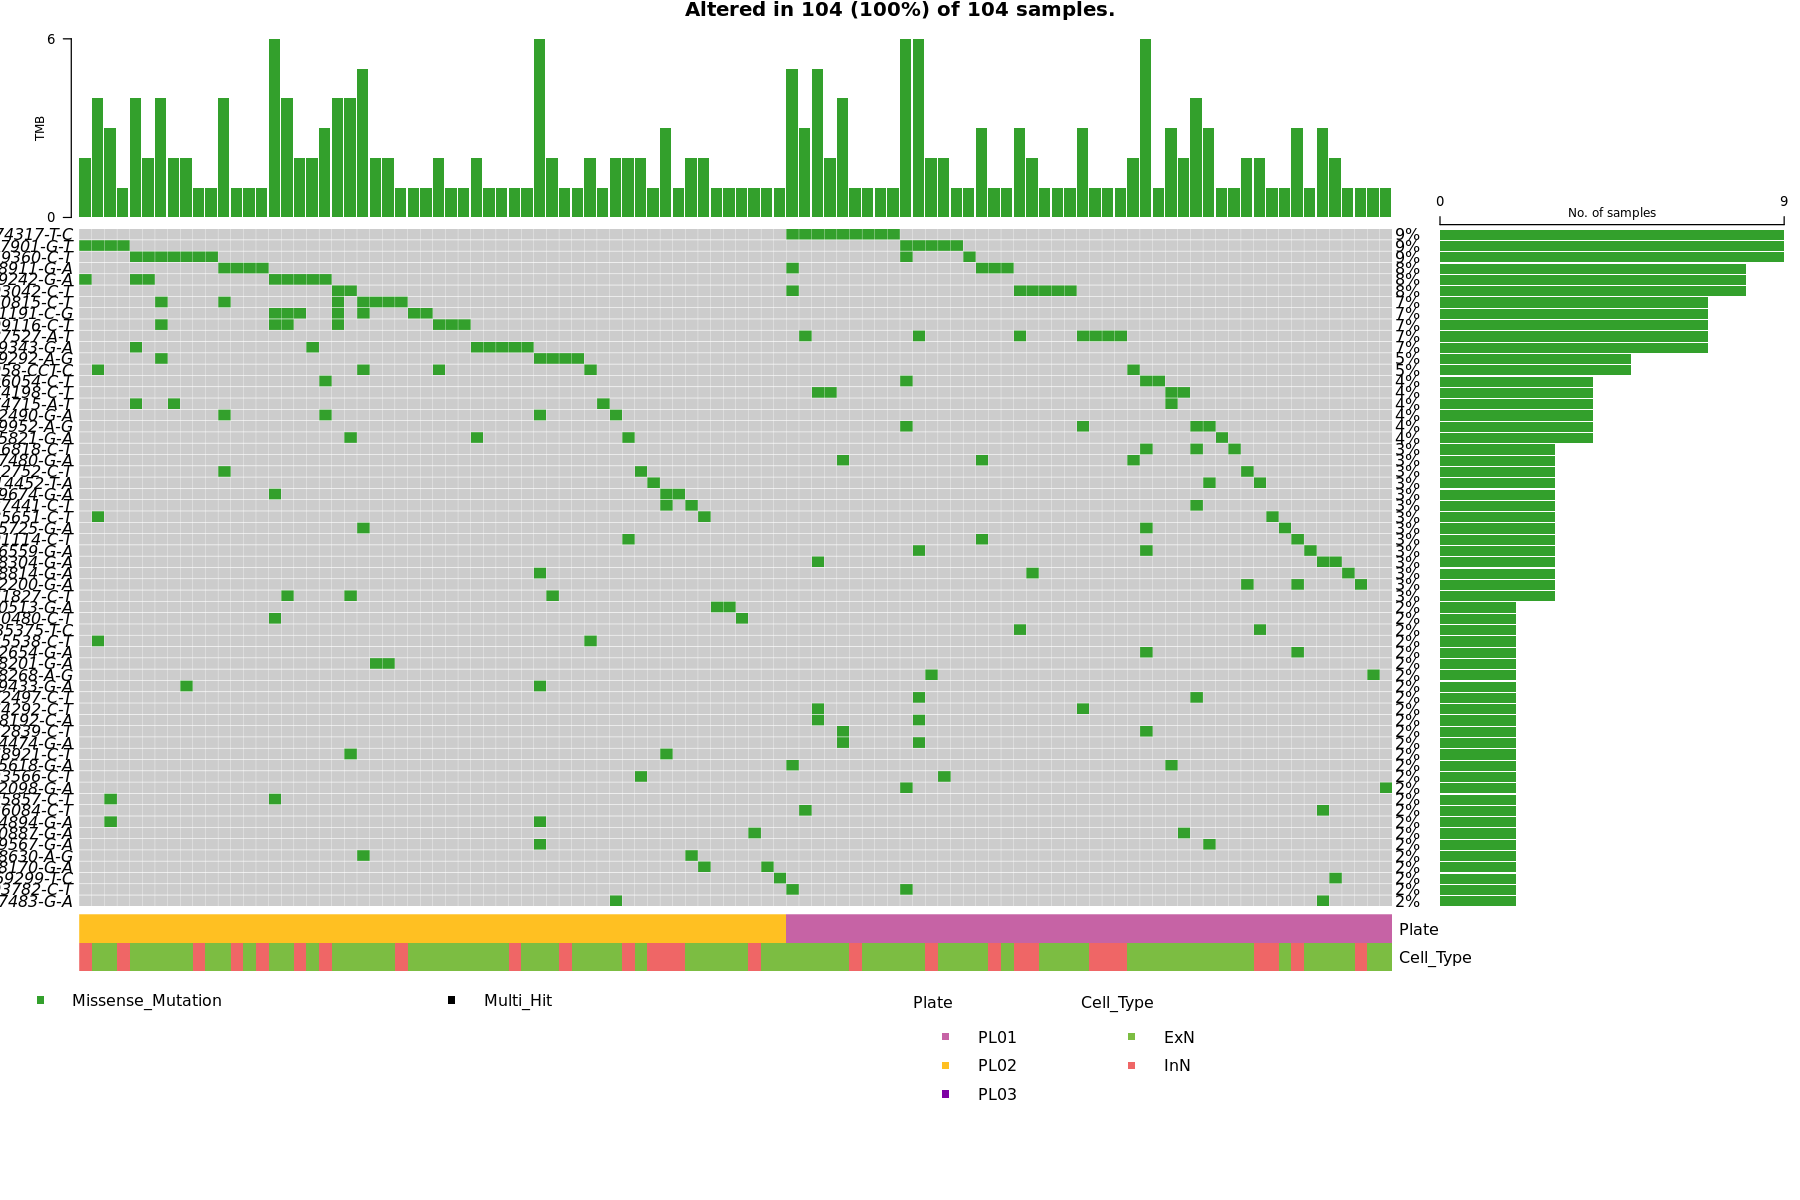

In [39]:
options(repr.plot.width=15, repr.plot.height=10)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = TRUE ,top = 1000, annotationColor = anno_cols, draw_titv = FALSE)

In [33]:
pdf(file="7669_ResolveOME_oncoplot_Plate_sorted2.pdf",height=10, width=15)
oncoplot(maf = laml, clinicalFeatures = c('Plate','Cell_Type'), sortByAnnotation = TRUE, annotationColor = anno_cols, top = 1000, draw_titv = FALSE)
dev.off()

png 
  2